In [ ]:
!pip install LangChain -q
!pip install -U langchain-community -q
!pip install pypdf -q
!pip install yt_dlp -q
!pip install pydub -q
!pip install unstructured -q
!pip install docx2txt -q
!pip install openai -q
!pip install python-dotenv -q
!pip install xlrd -q
!pip install youtube-transcript-api -q
!pip install pytube -q
!pip install tiktoken -q
!pip install chromadb==0.3.29 -q
!pip install lark -q

In [1]:
from openai import OpenAI
import openai
import os

openai.api_key = "type_your_api_key_here"
client = OpenAI(
    # This is the default and can be omitted
    api_key=openai.api_key,
)

llm_model = "gpt-4o-mini"

# 데이터 불러오기

## 문서 불러오기

### PDF 불러오기

In [2]:
from langchain.document_loaders import PyPDFLoader

pdf_file = '/kaggle/input/documents/()(19563)(20240719).pdf'
loader = PyPDFLoader(pdf_file)
pages = loader.load()

In [3]:
len(pages)

53

In [4]:
# 첫 페이지 확인
page = pages[10]
print(page.page_content)

법제처                                                            11                                                       국가법령정보센터
상속세 및 증여세법 
2. 30억원
② 제1항에 따른 배우자 상속공제는 제67조에 따른 상속세과세표준신고기한의 다음날부터 9개월이 되는 날(이하
이 조에서 “배우자상속재산분할기한”이라 한다)까지 배우자의 상속재산을 분할(등기ㆍ등록ㆍ명의개서 등이 필요한
경우에는 그 등기ㆍ등록ㆍ명의개서 등이 된 것에 한정한다. 이하 이 조에서 같다)한 경우에 적용한다. 이 경우 상속
인은 상속재산의 분할사실을 배우자상속재산분할기한까지 납세지 관할세무서장에게 신고하여야 한다.<개정 2020.
12. 22.>
③ 제2항에도 불구하고 대통령령으로 정하는 부득이한 사유로 배우자상속재산분할기한까지 배우자의 상속재산을
분할할 수 없는 경우로서 배우자상속재산분할기한[부득이한 사유가 소(訴)의 제기나 심판청구로 인한 경우에는 소
송 또는 심판청구가 종료된 날]의 다음날부터 6개월이 되는 날(배우자상속재산분할기한의 다음날부터 6개월이 지
나 제76조에 따른 과세표준과 세액의 결정이 있는 경우에는 그 결정일을 말한다)까지 상속재산을 분할하여 신고하
는 경우에는 배우자상속재산분할기한까지 분할한 것으로 본다. 다만, 상속인이 그 부득이한 사유를 대통령령으로
정하는 바에 따라 배우자상속재산분할기한까지 납세지 관할세무서장에게 신고하는 경우에 한정한다.<개정 2014.
1. 1., 2019. 12. 31., 2020. 6. 9.>
④ 제1항의 경우에 배우자가 실제 상속받은 금액이 없거나 상속받은 금액이 5억원 미만이면 제2항에도 불구하고
5억원을 공제한다.
[전문개정 2010. 1. 1.]
[2014. 1. 1. 법률 제12168호에 의하여 2012. 5. 31. 위헌결정된 이 조 제3항을 개정함.]
 
제20조(그 밖의 인적공제) ① 거주자의 사망으로 상속이 개시되는 경우로서 

In [5]:
# 메타 데이터

page.metadata

{'source': '/kaggle/input/documents/()(19563)(20240719).pdf', 'page': 10}

### 워드 파일 불러오기

In [6]:
from langchain.document_loaders import Docx2txtLoader

docs_file = "/kaggle/input/documents/()(19356)(20230719).docx"

loader = Docx2txtLoader(docs_file)
data = loader.load()

In [7]:
data[0].page_content

'주택임대차보호법\n\n주택임대차보호법 ( 약칭: 주택임대차법 )\n\n[시행 2023. 7. 19.] [법률 제19356호, 2023. 4. 18., 일부개정]\n\n법무부(법무심의관실) 02-2110-3164\n\n국토교통부(주택임대차기획팀) 044-201-3348, 4178\n\n\n\n제1조(목적) 이 법은 주거용 건물의 임대차(賃貸借)에 관하여 「민법」에 대한 특례를 규정함으로써 국민 주거생활의 안정을 보장함을 목적으로 한다.\n\n[전문개정 2008. 3. 21.]\n\n\n\n제2조(적용 범위) 이 법은 주거용 건물(이하 “주택”이라 한다)의 전부 또는 일부의 임대차에 관하여 적용한다. 그 임차주택(賃借住宅)의 일부가 주거 외의 목적으로 사용되는 경우에도 또한 같다.\n\n[전문개정 2008. 3. 21.]\n\n\n\n제3조(대항력 등) ① 임대차는 그 등기(登記)가 없는 경우에도 임차인(賃借人)이 주택의 인도(引渡)와 주민등록을 마친 때에는 그 다음 날부터 제삼자에 대하여 효력이 생긴다. 이 경우 전입신고를 한 때에 주민등록이 된 것으로 본다.\n\n② 주택도시기금을 재원으로 하여 저소득층 무주택자에게 주거생활 안정을 목적으로 전세임대주택을 지원하는 법인이 주택을 임차한 후 지방자치단체의 장 또는 그 법인이 선정한 입주자가 그 주택을 인도받고 주민등록을 마쳤을 때에는 제1항을 준용한다. 이 경우 대항력이 인정되는 법인은 대통령령으로 정한다.<개정 2015. 1. 6.>\n\n③ 「중소기업기본법」 제2조에 따른 중소기업에 해당하는 법인이 소속 직원의 주거용으로 주택을 임차한 후 그 법인이 선정한 직원이 해당 주택을 인도받고 주민등록을 마쳤을 때에는 제1항을 준용한다. 임대차가 끝나기 전에 그 직원이 변경된 경우에는 그 법인이 선정한 새로운 직원이 주택을 인도받고 주민등록을 마친 다음 날부터 제삼자에 대하여 효력이 생긴다.<신설 2013. 8. 13.>\n\n④ 임차주택의 양수인(讓受人)(그 밖에 임대할 권리를 승계한 자를 포함한다)은 임대인(賃貸

In [8]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

## 유튜브 자막 가져오기

### 저장된 CC 파일 가져오기

In [9]:
from langchain.document_loaders import YoutubeLoader

def get_script(url, language="en", add_video_info=True):
    loader = YoutubeLoader.from_youtube_url(
    url,
    add_video_info=add_video_info,
    language=language,
    )
    return loader.load()

In [10]:
url = "https://www.youtube.com/watch?v=arj7oStGLkU"
raw_script_data = get_script(url, "en")[0].page_content

In [11]:
raw_script_data

'So in college, I was a government major, which means I had to write\na lot of papers. Now, when a normal student writes a paper, they might spread the work out\na little like this. So, you know -- (Laughter) you get started maybe a little slowly, but you get enough done in the first week that, with some heavier days later on, everything gets done, things stay civil. (Laughter) And I would want to do that like that. That would be the plan. I would have it all ready to go, but then, actually, the paper\nwould come along, and then I would kind of do this. (Laughter) And that would happen every single paper. But then came my 90-page senior thesis, a paper you\'re supposed\nto spend a year on. And I knew for a paper like that,\nmy normal work flow was not an option. It was way too big a project. So I planned things out, and I decided I kind of had\nto go something like this. This is how the year would go. So I\'d start off light, and I\'d bump it up in the middle months, and then at the en

### Whisper로 STT 적용하기

In [12]:
url = "https://www.youtube.com/watch?v=arj7oStGLkU"
save_dir = "docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser(api_key=openai.api_key)
)
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=arj7oStGLkU
[youtube] arj7oStGLkU: Downloading webpage
[youtube] arj7oStGLkU: Downloading ios player API JSON
[youtube] arj7oStGLkU: Downloading web creator player API JSON
[youtube] arj7oStGLkU: Downloading player 43bc9526
[youtube] arj7oStGLkU: Downloading m3u8 information
[info] arj7oStGLkU: Downloading 1 format(s): 140
[download] Destination: docs/youtube//Inside the Mind of a Master Procrastinator ｜ Tim Urban ｜ TED.m4a
[download] 100% of   13.02MiB in 00:00:00 at 18.71MiB/s    
[FixupM4a] Correcting container of "docs/youtube//Inside the Mind of a Master Procrastinator ｜ Tim Urban ｜ TED.m4a"
[ExtractAudio] Not converting audio docs/youtube//Inside the Mind of a Master Procrastinator ｜ Tim Urban ｜ TED.m4a; file is already in target format m4a
Transcribing part 1!


In [13]:
docs[0].page_content[0:500]

'So in college, I was a government major, which means I had to write a lot of papers. Now, when a normal student writes a paper, they might spread their work out a little like this. So, you know. You get started maybe a little slowly, but you get enough done in the first week that you can do a lot more in the second week. So I started writing a lot of papers in college. And I was a government major, so I had to write a lot of papers. Now, when a normal student writes a paper, you get started mayb'

## HTML 페이지 불러오기

In [14]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://ko.wikipedia.org/wiki/2024%EB%85%84_%ED%95%98%EA%B3%84_%EC%98%AC%EB%A6%BC%ED%94%BD")
docs = loader.load()

In [15]:
print(docs[0].page_content[2800:3500])

28년 하계 올림픽 개최 도시를 동시에 결정한다는 성명을 발표했다.
2017년 7월 31일, 미국 로스앤젤레스는 국제 올림픽 위원회의 합의를 통해 2024년 하계 올림픽 대신 2028년 하계 올림픽을 유치하기로 결정하였다. 따라서 2024년 하계 올림픽은 사실상 프랑스 파리가 유치하게 되었다. 2024년 하계 올림픽을 개최하는 도시는 2024년 하계 패럴림픽도 개최하게 된다.
프랑스로서는 1924년 파리 하계 올림픽 이후 100년 만에 다시 열리는 하계 올림픽 대회이며 동하계 전체로는 1992년 알베르빌 동계 올림픽 이후 32년 만에 다시 개최하는 올림픽이다. 또한 2019년 프랑스 여자 월드컵 이후 5년 만에 다시 열리는 대규모 스포츠 대회이기도 하다. 그 결과적으로 MBC와 KBS 2가 결방이 된다


개최 도시 선정[편집]
 2024년과 2028년 하계 올림픽 개최지 선정  문서를 참고하십시오.2024년 하계 올림픽의 후보 도시로는 파리, 로스앤젤레스, 함부르크, 부다페스트, 로마가 도전하였다. 그러나 유치 포기, 정치 여건 불확실, 예산 제약 등의 문제로 유치전이 더디게 진행되었다.[1] 2015년 11월 29일에는 독일 함부르크가 지역 주민투표를 거쳐 올림픽 유치를 포기하였다.[2] 이후 2016년 9월 21일에는 이탈리아 로마가 제정 문제를 이유로 후보에서 물러났고,[3] 2017년 2월 22일에는 헝가리 부다페스트가 올림


# 문서 자르기(Chunking)

데이터를 벡터 스토어에 저장하는 과정 전에는 반드시 데이터를 일정 길이로 나누어야 합니다. LangChain에는 상황에 따라 다르게 사용할 수 있는 함수들을 제공합니다.

* CharacterTextSplitter(): 문자를 기준으로 텍스트를 분할
* MarkdownHeaderTextSplitter(): 지정된 헤더를 기준으로 마크다운 파일을 분할
* TokenTextSplitter(): 토큰을 기준으로 텍스트를 분할
* SentenceTransformersTokenTextSplitter(): 토큰을 기준으로 텍스트를 분할
* RecursiveCharacterTextSplitter(): 문자를 기준으로 텍스트를 분할. 여러 문자를 재귀적으로 시도하여 적합한 분할 방식을 찾음
* Language(): CPP, Python, Ruby, Markdown 등을 위한 분할기
* NLTKTextSplitter(): NLTK(자연어 도구 키트)를 사용하여 문장을 기준으로 텍스트를 분할
* SpacyTextSplitter(): Spacy를 사용하여 문장을 기준으로 텍스트를 분할

## RecursiveCharacterTextSplitter & CharacterTextSplitter

In [16]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

chunk_size =50
chunk_overlap = 10

r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [17]:
loader = PyPDFLoader(pdf_file)
pages = loader.load()

### RecursiveCharacterTextSplitter

In [18]:
r_splitter.split_text(pages[0].page_content)

['법제처',
 '1',
 '국가법령정보센터',
 '상속세 및 증여세법 \n \n상속세 및 증여세법',
 '[시행 2024. 7. 19.] [법률 제19563호, 2023. 7. 18.,',
 '7. 18., 타법개정]',
 '기획재정부 (재산세제과) 044-215-4311',
 '제1장 총칙 <개정 2010. 1. 1.>',
 '제1조(목적) 이 법은 상속세 및 증여세의 과세(課稅) 요건과 절차를 규정함으로써 상속세',
 '상속세 및 증여세의 공정한 과세, 납',
 '세의무의 적정한 이행 확보 및 재정수입의 원활한 조달에 이바지함을 목적으로 한다.',
 '[본조신설 2015. 12. 15.]',
 '[종전 제1조는 제3조로 이동 <2015. 12. 15.>]',
 '제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020. 12.',
 '2020. 12. 22.>',
 '1. “상속”이란 「민법」 제5편에 따른 상속을 말하며, 다음 각 목의 것을 포함한다.',
 '가. 유증(遺贈)',
 '나. 「민법」 제562조에 따른 증여자의 사망으로 인하여 효력이 생길 증여(상속개시일 전',
 '전 10년 이내에 피상속인이',
 '상속인에게 진 증여채무 및 상속개시일 전 5년 이내에 피상속인이 상속인이 아닌 자에게 진',
 '아닌 자에게 진 증여채무의 이행',
 '중에 증여자가 사망한 경우의 그 증여를 포함한다. 이하 “사인증여”(死因贈與)라 한다)',
 '다. 「민법」 제1057조의2에 따른 피상속인과 생계를 같이 하고 있던 자, 피상속인의',
 '자, 피상속인의 요양간호를 한 자 및 그 밖에',
 '피상속인과 특별한 연고가 있던 자(이하 “특별연고자”라 한다)에 대한 상속재산의',
 '대한 상속재산의 분여(分與)',
 '라. 「신탁법」 제59조에 따른 유언대용신탁(이하 “유언대용신탁”이라 한다)',
 '마. 「신탁법」 제60조에 따른 수익자연속신탁(이하 “수익자연속신탁”이라 한다)',
 '2. “상속개시일”이란 피상속인이 사망한 날을 말한다. 다만

### CharacterTextSplitter

In [19]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' '
)
c_splitter.split_text(pages[0].page_content)

['법제처 1 국가법령정보센터\n상속세 및 증여세법 \n \n상속세 및 증여세법 \n[시행 2024.',
 '[시행 2024. 7. 19.] [법률 제19563호, 2023. 7. 18.,',
 '7. 18., 타법개정] \n기획재정부 (재산세제과) 044-215-4311 \n 제1장 총칙',
 '제1장 총칙 <개정 2010. 1. 1.>\n \n제1조(목적) 이 법은 상속세 및',
 '이 법은 상속세 및 증여세의 과세(課稅) 요건과 절차를 규정함으로써 상속세 및 증여세의',
 '상속세 및 증여세의 공정한 과세, 납\n세의무의 적정한 이행 확보 및 재정수입의 원활한',
 '재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2015. 12.',
 '2015. 12. 15.]\n[종전 제1조는 제3조로 이동 <2015. 12. 15.>]',
 '12. 15.>]\n \n제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정',
 '같다. <개정 2020. 12. 22.>\n1. “상속”이란 「민법」 제5편에 따른 상속을',
 '따른 상속을 말하며, 다음 각 목의 것을 포함한다.\n가. 유증(遺贈) \n나. 「민법」',
 '나. 「민법」 제562조에 따른 증여자의 사망으로 인하여 효력이 생길 증여(상속개시일 전',
 '증여(상속개시일 전 10년 이내에 피상속인이 \n상속인에게 진 증여채무 및 상속개시일 전',
 '및 상속개시일 전 5년 이내에 피상속인이 상속인이 아닌 자에게 진 증여채무의 이행 \n중에',
 '이행 \n중에 증여자가 사망한 경우의 그 증여를 포함한다. 이하 “사인증여”(死因贈與)라',
 '한다) \n다. 「민법」 제1057조의2에 따른 피상속인과 생계를 같이 하고 있던 자,',
 '하고 있던 자, 피상속인의 요양간호를 한 자 및 그 밖에 \n피상속인과 특별한 연고가 있던',
 '특별한 연고가 있던 자(이하 “특별연고자”라 한다)에 대한 상속재산의 분여(分與) \n라.',
 '분여(分與) \n라. 「신탁법」 제59조에 따른 

### TokenTextSplitter

In [20]:
from langchain.text_splitter import TokenTextSplitter
text_splitter = TokenTextSplitter(chunk_size=50, chunk_overlap=3)

In [21]:
text_splitter.split_text(raw_script_data[:1000])

['So in college, I was a government major, which means I had to write\na lot of papers. Now, when a normal student writes a paper, they might spread the work out\na little like this. So, you know -- (',
 ' know -- (Laughter) you get started maybe a little slowly, but you get enough done in the first week that, with some heavier days later on, everything gets done, things stay civil. (Laughter) And I would want to do',
 ' want to do that like that. That would be the plan. I would have it all ready to go, but then, actually, the paper\nwould come along, and then I would kind of do this. (Laughter) And that would',
 " And that would happen every single paper. But then came my 90-page senior thesis, a paper you're supposed\nto spend a year on. And I knew for a paper like that,\nmy normal work flow was not an option. It",
 " option. It was way too big a project. So I planned things out, and I decided I kind of had\nto go something like this. This is how the year would go. So I'd start off l

In [22]:
text_splitter.split_text(pages[0].page_content)

['법제처                                         ',
 '                      1                            ',
 '                              국가법령정보�',
 '�센터\n상속세 및 증여세법 \n \n상속세 및 �',
 '� 증여세법 \n[시행 2024. 7. 19.] [법률 제19563호, 2023. 7. 18',
 ' 7. 18., 타법개정] \n기획재정부 (재산세제�',
 '�과) 044-215-4311 \n       제1장 총칙 <개정 2010. 1. 1.>\n \n',
 '\n \n제1조(목적) 이 법은 상속세 및 증여세의 ',
 '의 과세(課稅) 요건과 절차를 규정함으로�',
 '��써 상속세 및 증여세의 공정한 과세, 납\n�',
 '�\n세의무의 적정한 이행 확보 및 재정수입의',
 '�의 원활한 조달에 이바지함을 목적으로 한다.',
 '다.\n[본조신설 2015. 12. 15.]\n[종전 제1조는 제3조�',
 '�로 이동 <2015. 12. 15.>]\n \n제2조(정의) 이 법에서 사�',
 ' 사용하는 용어의 뜻은 다음과 같다. <개정 2020. 12. 22',
 ' 12. 22.>\n1. “상속”이란 「민법」 제5편에 따른 상',
 ' 상속을 말하며, 다음 각 목의 것을 포함한다.\n�',
 '.\n가. 유증(遺贈) \n나. 「민법」 제562조에 따른 �',
 '�� 증여자의 사망으로 인하여 효력이 생길 증',
 ' 증여(상속개시일 전 10년 이내에 피상속인�',
 '인이 \n상속인에게 진 증여채무 및 상속개시',
 '시일 전 5년 이내에 피상속인이 상속인이 아닌',
 '�닌 자에게 진 증여채무의 이행 \n중에 증여�',
 '��자가 사망한 경우의 그 증여를 포함한다. �',
 '. 이하 “사인증여”(死因贈與)라 한다) \n다. 「민�',
 '��법」 제1057조의2에 따른 피상속인과 생계를',
 '를 같이 하고 있던 자, 피상속인의

# Embedding과 Vector DB

데이터를 청크 단위로 분할했다면, 이를 벡터 스토어에 저장해야합니다. 그러나 벡터 스토어에 데이터를 저장하기 위해선, 데이터를 벡터(Vector)로 변환하는 과정이 선행됩니다. 

## Embedding
OpenAI의 Embedding 모델을 사용합니다.

In [23]:
from langchain.embeddings.openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings(openai_api_key=openai.api_key)

/opt/conda/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [24]:
sentence1 = "호랑이에게 물려가도 정신만 차리면 살 수 있다."
sentence2 = "꽁꽁 얼어붙은 한강 위로 고양이가 걸어다닙니다."
sentence3 = "늦었다고 생각될 때가 진짜 너무 늦었다."

In [25]:
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

In [26]:
import numpy as np

print('The similarity between sentences one and two is' , np.dot(embedding1, embedding2))
print('The similarity between sentences one and three is' , np.dot(embedding1, embedding3))
print('The similarity between sentences two and three' , np.dot(embedding2, embedding3))

The similarity between sentences one and two is 0.8746704893439337
The similarity between sentences one and three is 0.7785541268902239
The similarity between sentences two and three 0.8056129268610559


In [27]:
loaders = [PyPDFLoader(pdf_file), 
           Docx2txtLoader(docs_file)
          ]

docs = []
for loader in loaders:
    docs.extend(loader.load())

In [28]:
chunk_size = 1000
chunk_overlap = 10

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [29]:
splits = text_splitter.split_documents(docs)
len(splits)

150

## Vector DB
LangChain에서 지원하는 벡터DB 종류는 30여 가지가 넘습니다. 우리는 그중 비교적 속도가 빠르고 메모리 소비량이 적은 Chroma DB를 사용해보겠습니다.

In [30]:
from langchain.vectorstores import Chroma
persist_directory = 'docs/chroma/'
!rm -rf ./docs/chroma  # remove old database files if any

In [32]:
texts = [
    """Amanita phalloides 라는 종속명의 알광대버섯은 크고 인상적인 지상(지상에 위치한) 자실체(균사체)를 가지고 있습니다.""",
    """유럽의 숲에서 종종 발견되는, 큰 자실체를 가진 버섯은 Amanita phalloides(알광대 버섯)입니다. 일부 품종은 색이 하얗습니다.""",
    """A. phalloides(알광대버섯), 일명 데스캡(Death Cap)은 알려진 버섯 중 가장 독성이 강한 것 중 하나입니다.""",
]
smalldb = Chroma.from_texts(texts, embedding=embedding)
question = "하얀 자실체로 이루어지고, 독성이 강한 버섯의 이름을 알려줘"

In [38]:
dir(smalldb)

['_Chroma__query_collection',
 '_LANGCHAIN_DEFAULT_COLLECTION_NAME',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_asimilarity_search_with_relevance_scores',
 '_client',
 '_client_settings',
 '_collection',
 '_cosine_relevance_score_fn',
 '_embedding_function',
 '_euclidean_relevance_score_fn',
 '_get_retriever_tags',
 '_max_inner_product_relevance_score_fn',
 '_persist_directory',
 '_select_relevance_score_fn',
 '_similarity_search_with_relevance_scores',
 'aadd_documents',
 'aadd_texts',
 'add_documents',
 'add_images',
 'add_texts',
 'adelete',
 'afrom_documents',
 'afrom_texts',

In [33]:
smalldb.similarity_search(question, k=2)

[Document(page_content='유럽의 숲에서 종종 발견되는, 큰 자실체를 가진 버섯은 Amanita phalloides(알광대 버섯)입니다. 일부 품종은 색이 하얗습니다.'),
 Document(page_content='A. phalloides(알광대버섯), 일명 데스캡(Death Cap)은 알려진 버섯 중 가장 독성이 강한 것 중 하나입니다.')]

In [34]:
vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embedding,
    persist_directory=persist_directory
)

print(vectordb._collection.count())

150


In [35]:
question = "상속세 및 증여세법의 목적은 무엇인가?"
docs = vectordb.similarity_search(question,k=3)
len(docs)

3

In [36]:
docs

[Document(metadata={'source': '/kaggle/input/documents/()(19563)(20240719).pdf', 'page': 0}, page_content='법제처                                                            1                                                       국가법령정보센터\n상속세 및 증여세법 \n \n상속세 및 증여세법 \n[시행 2024. 7. 19.] [법률 제19563호, 2023. 7. 18., 타법개정] \n기획재정부 (재산세제과) 044-215-4311 \n       제1장 총칙 <개정 2010. 1. 1.>\n \n제1조(목적) 이 법은 상속세 및 증여세의 과세(課稅) 요건과 절차를 규정함으로써 상속세 및 증여세의 공정한 과세, 납\n세의무의 적정한 이행 확보 및 재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2015. 12. 15.]\n[종전 제1조는 제3조로 이동 <2015. 12. 15.>]\n \n제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020. 12. 22.>\n1. “상속”이란 「민법」 제5편에 따른 상속을 말하며, 다음 각 목의 것을 포함한다.\n가. 유증(遺贈) \n나. 「민법」 제562조에 따른 증여자의 사망으로 인하여 효력이 생길 증여(상속개시일 전 10년 이내에 피상속인이 \n상속인에게 진 증여채무 및 상속개시일 전 5년 이내에 피상속인이 상속인이 아닌 자에게 진 증여채무의 이행 \n중에 증여자가 사망한 경우의 그 증여를 포함한다. 이하 “사인증여”(死因贈與)라 한다) \n다. 「민법」 제1057조의2에 따른 피상속인과 생계를 같이 하고 있던 자, 피상속인의 요양간호를 한 자 및 그 밖에 \n피상속인과 특별한 연고가 있던 자(이하 “특별연고자”라 한다)에 대한 상속재산의 분여(分與) \n라. 「신탁법」 제59조에 따른 유언대용신탁(이하

In [37]:
docs[0].page_content


'법제처                                                            1                                                       국가법령정보센터\n상속세 및 증여세법 \n \n상속세 및 증여세법 \n[시행 2024. 7. 19.] [법률 제19563호, 2023. 7. 18., 타법개정] \n기획재정부 (재산세제과) 044-215-4311 \n       제1장 총칙 <개정 2010. 1. 1.>\n \n제1조(목적) 이 법은 상속세 및 증여세의 과세(課稅) 요건과 절차를 규정함으로써 상속세 및 증여세의 공정한 과세, 납\n세의무의 적정한 이행 확보 및 재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2015. 12. 15.]\n[종전 제1조는 제3조로 이동 <2015. 12. 15.>]\n \n제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020. 12. 22.>\n1. “상속”이란 「민법」 제5편에 따른 상속을 말하며, 다음 각 목의 것을 포함한다.\n가. 유증(遺贈) \n나. 「민법」 제562조에 따른 증여자의 사망으로 인하여 효력이 생길 증여(상속개시일 전 10년 이내에 피상속인이 \n상속인에게 진 증여채무 및 상속개시일 전 5년 이내에 피상속인이 상속인이 아닌 자에게 진 증여채무의 이행 \n중에 증여자가 사망한 경우의 그 증여를 포함한다. 이하 “사인증여”(死因贈與)라 한다) \n다. 「민법」 제1057조의2에 따른 피상속인과 생계를 같이 하고 있던 자, 피상속인의 요양간호를 한 자 및 그 밖에 \n피상속인과 특별한 연고가 있던 자(이하 “특별연고자”라 한다)에 대한 상속재산의 분여(分與) \n라. 「신탁법」 제59조에 따른 유언대용신탁(이하 “유언대용신탁”이라 한다) \n마. 「신탁법」 제60조에 따른 수익자연속신탁(이하 “수익자연속신탁”이라 한다) \n2. “상속개시일”이란 피상속인이 사망한 날을 말한다. 다만, 피상속인의 

### 추가 검색
아래 질문들에 대한 답도 찾아봅시다.
1. 상속 개시일은 언제로 정의되는가?
    - 답: 상속개시일”이란 피상속인이 사망한 날을 말한다. 다만, 피상속인의 실종선고로 인하여 상속이 개시되는 경우에 는 실종선고일을 말한다. (제2조 제2항)

2. 증여의 정의는 무엇인가?
    - 답: “증여”란 그 행위 또는 거래의 명칭ᆞ형식ᆞ목적 등과 관계없이 직접 또는 간접적인 방법으로 타인에게 무상으로 유형ᆞ무형의 재산 또는 이익을 이전(移轉)(현저히 낮은 대가를 받고 이전하는 경우를 포함한다)하거나 타인의 재 산가치를 증가시키는 것을 말한다. 다만, 유증, 사인증여, 유언대용신탁 및 수익자연속신탁은 제외한다. (제2조 제6항)

3. 상속세 과세대상에 해당하는 상속재산은 무엇인가?
    - 답:
    1. 피상속인이 거주자인 경우: 모든 상속재산
    2. 피상속인이 비거주자인 경우: 국내에 있는 모든 상속재산(제3조 제1항)

4. 피상속인의 사망으로 인한 생명보험금은 어떻게 과세되는가?
    - 답:
    
    1. 피상속인의 사망으로 인하여 받는 생명보험 또는 손해보험의 보험금으로서 피상속인이 보험계약자인 보험계약에 의하여 받는 것은 상속재산으로 본다.
    
    2. 보험계약자가 피상속인이 아닌 경우에도 피상속인이 실질적으로 보험료를 납부하였을 때에는 피상속인을 보험 계약자로 보아 제1항을 적용한다. (제8조 제1항)

5. 가업상속공제 한도 금액은 얼마인가?
    - 답: 
    1. 피상속인이 10년 이상 20년 미만 계속하여 경영한 경우: 300억원
    2. 피상속인이 20년 이상 30년 미만 계속하여 경영한 경우: 400억원
    3. 피상속인이 30년 이상 계속하여 경영한 경우(제18조의2 제1항 제3호)
    
6. 임대차가 끝난 후 보증금이 반환되지 아니한 경우에는 어떻게 해야 할까?¶
    - 답: 임차인은 임차주택의 소재지를 관할하는 지방법원ㆍ지방법원지원 또는 시ㆍ군 법원에 임차권등기명령을 신청할 수 있다.
    
7. 확정일자를 갖추지 않은 임차인은 어떤 문제가 생기는가?
    - 답: 민사집행법에 따른 경매 또는 국세징수법에 따른 공매를 할 때에 임차주택(대지를 포함한다)의 환가대금에서 후순위권리자나 그 밖의 채권자보다 우선하여 보증금을 변제받을 권리가 없어진다.

# 회수

벡터 스토어에 데이터가 저장되었다면, 우리는 LLM으로 문장을 생성할 때 스토어를 참조하도록 지시할 수 있습니다. 모델은 사용자가 입력한 프롬프트의 요청과 가장 거리가 가까운 k개의 문장 및 글을 스토어에서 회수하며, 이를 바탕으로 출력 텍스트를 생성합니다. 이 과정에서 선택된 k개의 문장을 압축하여 생성 텍스트에 올바르게 포함시켜야 정확도 높은 문장을 생성할 수 있습니다.
이 과정에서 회수된 내용을 압축 및 증강하는 Compressor LLM을 사용해야합니다.
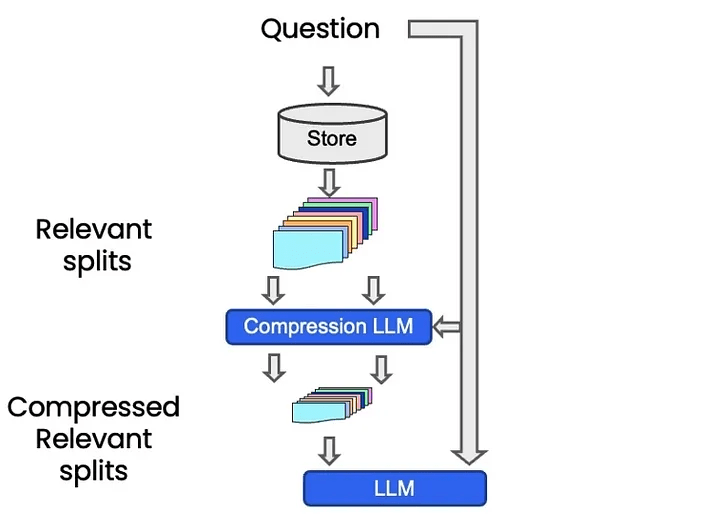

In [40]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.llms import OpenAI
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain.chains.query_constructor.base import AttributeInfo

In [41]:
# 추출한 텍스트를 압축하는 함수를 선언
def pretty_print_docs(docs):
    print(f"\n{'-' * 100}\n".join([f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]))

Compression LLM에게 정보를 전달하기 위한 메타데이터를 전달합니다.

In [42]:
document_content_description = "Q&A on Law docs"

metadata_field_info = [
    AttributeInfo(
        name="source",
        description="The law reference chunk is from, should be one of `/kaggle/input/documents/()(19356)(20230719).docx`, `/kaggle/input/documents/()(19563)(20240719).pdf`",
        type="string",
    ),
    AttributeInfo(
        name="page",
        description="The page from the part of korean law about house rent and Capital gains tax",
        type="integer",
    ),
]

In [43]:
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model=llm_model, 
             temperature=0, 
             openai_api_key= openai.api_key)

retriever = SelfQueryRetriever.from_llm(
    llm,
    vectordb,
    document_content_description,
    metadata_field_info,
    verbose=True
)

/opt/conda/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [44]:
# 벡터 스토어의 결과를 래핑하는 과정
compressor = LLMChainExtractor.from_llm(llm)

compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vectordb.as_retriever()
)

In [45]:
question = "상속세 및 증여세법의 목적은 무엇인가?"

compressed_docs = compression_retriever.get_relevant_documents(question)
pretty_print_docs(compressed_docs)

/opt/conda/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


Document 1:

제1조(목적) 이 법은 상속세 및 증여세의 과세(課稅) 요건과 절차를 규정함으로써 상속세 및 증여세의 공정한 과세, 납세의무의 적정한 이행 확보 및 재정수입의 원활한 조달에 이바지함을 목적으로 한다.


In [46]:
question = "가업상속공제 한도 금액은 얼마인가?"

compressed_docs = compression_retriever.get_relevant_documents(question)
pretty_print_docs(compressed_docs)

Document 1:

1. 피상속인이 10년 이상 20년 미만 계속하여 경영한 경우: 300억원
----------------------------------------------------------------------------------------------------
Document 2:

2. 피상속인이 20년 이상 30년 미만 계속하여 경영한 경우: 400억원  
3. 피상속인이 30년 이상 계속하여 경영한 경우: 600억원


In [47]:
question = "임대차가 끝난 후 보증금이 반환되지 아니한 경우에는 어떻게 해야 할까?"

compressed_docs = compression_retriever.get_relevant_documents(question)
pretty_print_docs(compressed_docs)

Document 1:

임대차가 끝난 후 보증금이 반환되지 아니한 경우 임차인은 임차주택의 소재지를 관할하는 지방법원ㆍ지방법원지원 또는 시ㆍ군 법원에 임차권등기명령을 신청할 수 있다.
----------------------------------------------------------------------------------------------------
Document 2:

제13조(「소액사건심판법」의 준용) 임차인이 임대인에 대하여 제기하는 보증금반환청구소송에 관하여는 「소액사건심판법」 제6조, 제7조, 제10조 및 제11조의2를 준용한다.
